In [51]:
import xarray as xr
from pathlib import Path
import os
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
notebook_path = Path(os.getcwd())
root = notebook_path.parent

Load ensemble

In [94]:
reference_time = datetime(2023, 10, 4, 6)
time_str = reference_time.strftime('%Y%m%dT%HZ')
ensemble_path = f'{root}/MEPS_archive_lagged_ljungskile/meps_lagged_ensemble_{time_str}.nc'
ensemble = xr.open_dataset(ensemble_path)

Load NORA3

In [95]:
dt_end = reference_time + timedelta(hours=67)
if dt_end.month == reference_time.month:
    nora3_str = reference_time.strftime('%Y%m')
    nora3 = xr.open_dataset(f'{root}/NORA3_subset_atm_ljungskile/arome3km_1hr_{nora3_str}.nc')
else:
    nora3_str_1 = reference_time.strftime('%Y%m')
    obs_1 = xr.open_dataset(f'{root}/NORA3_subset_atm_ljungskile/arome3km_1hr_{nora3_str_1}.nc')
    nora3_str_2 = reference_time.strftime('%Y%m')
    obs_2 = xr.open_dataset(f'{root}/NORA3_subset_atm_ljungskile/arome3km_1hr_{nora3_str_2}.nc')
    nora3 = xr.concat([obs_1, obs_2], dim='time')
    

Filter NORA3

In [96]:
obs = nora3.sel(time=ensemble.time)

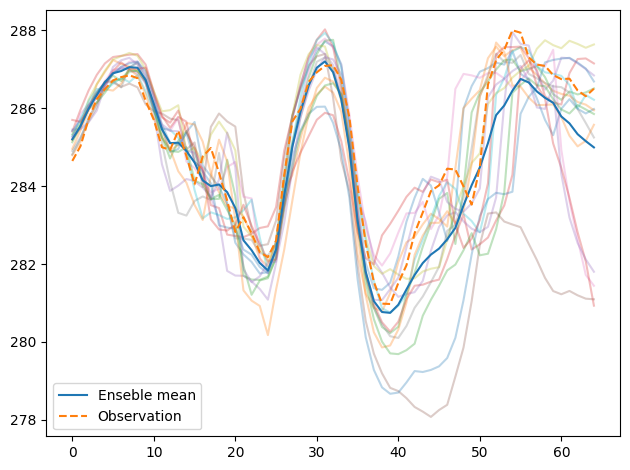

In [97]:
parameter = 'air_temperature_2m'
for i in ensemble.ensebmle_member.values:
    plt.plot(ensemble.isel(ensebmle_member=i)[parameter], alpha=0.3)
plt.plot(ensemble[parameter].mean(dim='ensebmle_member'), color='C0', label='Enseble mean')
plt.plot(obs[parameter], linestyle='--', color='C1', label='Observation')
plt.legend()
plt.tight_layout()

# Data transformatios

Some variables are common

In [98]:
common_vars = [var for var in ensemble.data_vars if var in obs.data_vars]
common_vars

['forecast_reference_time',
 'projection_lambert',
 'air_temperature_2m',
 'relative_humidity_2m',
 'air_pressure_at_sea_level']

Some are in a different format. E.g. the wind is given in (x, y) format for the enseble but in (speed, direction) format in NORA3. Moreover, the precipitation amount is given as hourly in NORA3, but cummulative in the enseble. There are also cloud and fog information that differ, possibly only through a simple transformation.
Four our purposes, let's begin with a subset of variables. Probably
1. Temperature
2. Wind (speed, direction)
3. Air pressure
4. Relative humidity
5. Precipitation
That leaves us with only two simple transformations.

The wind speed of gust seems very important for some applications, and I think it is available through some other NORA3 subset. Let's wait for now.

In [99]:
obs.data_vars

Data variables:
    forecast_reference_time          datetime64[ns] 8B ...
    projection_lambert               int32 4B ...
    air_pressure_at_sea_level        (time, height_above_msl) float32 260B ...
    air_temperature_2m               (time, height1) float32 260B 284.6 ... 2...
    high_type_cloud_area_fraction    (time, height0) float32 260B ...
    lifting_condensation_level       (time, height0) float32 260B ...
    low_type_cloud_area_fraction     (time, height0) float32 260B ...
    medium_type_cloud_area_fraction  (time, height0) float32 260B ...
    relative_humidity_2m             (time, height1) float32 260B ...
    wind_direction                   (time, height4) float32 260B ...
    wind_speed                       (time, height4) float32 260B ...
    surface_net_longwave_radiation   (time, height0) float32 260B ...
    surface_net_shortwave_radiation  (time, height0) float32 260B ...
    precipitation_amount_hourly      (time, height0) float32 260B ...
    fog        

In [100]:
ensemble.data_vars

Data variables:
    forecast_reference_time    datetime64[ns] 8B ...
    projection_lambert         (ensebmle_member) int32 60B ...
    air_temperature_2m         (ensebmle_member, time, height1) float32 4kB 2...
    relative_humidity_2m       (ensebmle_member, time, height1) float32 4kB ...
    x_wind_10m                 (ensebmle_member, time, height2) float32 4kB ...
    y_wind_10m                 (ensebmle_member, time, height2) float32 4kB ...
    cloud_area_fraction        (ensebmle_member, time, height0) float32 4kB ...
    air_pressure_at_sea_level  (ensebmle_member, time, height_above_msl) float32 4kB ...
    precipitation_amount_acc   (ensebmle_member, time, height0) float32 4kB ...
    snowfall_amount_acc        (ensebmle_member, time, height0) float32 4kB ...
    wind_speed_of_gust         (ensebmle_member, time, height2) float32 4kB ...
    fog_area_fraction          (ensebmle_member, time, height0) float32 4kB ...